# Early-Parkinson-Disease-Detection-Using-Audio-Signal-Processing

## 1. Load Packages

In [1]:
import os, sys
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.metrics import confusion_matrix

## 2. Load the dataset

In [2]:
df = pd.read_csv('ParkinsonData/controlGroup.csv')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

## 3. Valuable Insights on the Dataset
This dataset is composed of a range of biomedical voice measurements from 31 people,  
23 with Parkinson's disease (PD). Each column in the table is a  particular voice measure, 
and each row corresponds one of 195 voice  recording from these individuals ("name" column). 
The main aim of the  data is to discriminate healthy people from those with PD, according to  
"status" column which is set to 0 for healthy and 1 for PD.

Healthy : 48 Proportion: 24.62 %
Sick: 147 Proportion: 75.38 %


D:\MachineLearningProjects\sample_project_pandas\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


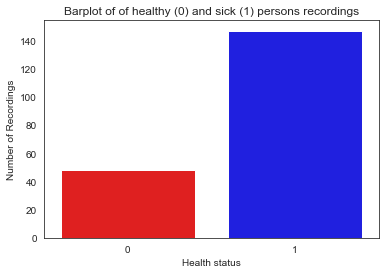

<Figure size 432x288 with 0 Axes>

In [4]:
### Plotting number of healthy (0) and sick (1) persons
sns.set_style("white")
a = sns.countplot(df['status'], 
              palette=["red", "blue"])
a.set(title = "Barplot of of healthy (0) and sick (1) persons recordings", 
     xlabel = 'Health status', 
     ylabel ='Number of Person')
plt.xlabel('Health status')
plt.ylabel('Number of Recordings')
###Print
h = df[df['status']==0]['status'].count()
s = df[df['status']==1]['status'].count()

print('Healthy :',h ,'Proportion:', round((h*100/(h+s)),2),"%")
print('Sick:',s,'Proportion:' ,round((s*100/(h+s)), 2),"%" )
plt.show();
plt.savefig("d1.png");


 ### 3.1 Incidence of fundamental voice frequency parameters on people's health status

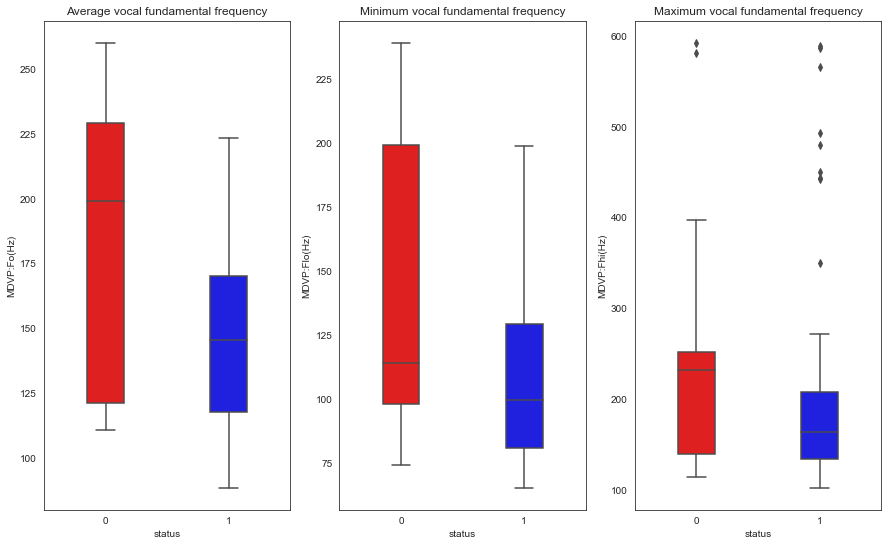

In [5]:
##set plot parameters
fig, ax = plt.subplots(1,3,figsize=(15,9))

##Boxplot for the average vocal fundamental frequency
sns.boxplot(x='status',y='MDVP:Fo(Hz)', data=df, width=0.3,
                palette=["red", "blue"], 
            ax=ax[0]).set(title = 'Average vocal fundamental frequency')

##Boxplot for the minimum vocal fundamental frequency
sns.boxplot(x='status',y='MDVP:Flo(Hz)', data=df, width=0.3,
                palette=["red", "blue"], 
            ax=ax[1]).set(title = "Minimum vocal fundamental frequency")

##Boxplot for the maximum vocal fundamental frequency
sns.boxplot(x='status',y='MDVP:Fhi(Hz)', data=df, width=0.3,
                palette=["red", "blue"], 
            ax=ax[2]).set(title = "Maximum vocal fundamental frequency")
plt.show();

#### Analysis of above diagram

* For the average vocal fundamental frequency (MDVP:Fo(Hz)), the median value is around 199 Hz for people who are normal.
* For people who are affected with Parkinsons the median value comes around 145 Hz. 
* For the maximum vocal fundamental frequency (MDVP:Fhi(Hz)), there are probably many outliers such for the 2 kind of status.

For the 3 parameters we can note that the number of healthy people are higher than the number of sick people.

### 3.2  Incidence of the measures of ratio of noise to tonal components in the voice on the health status of         individuals

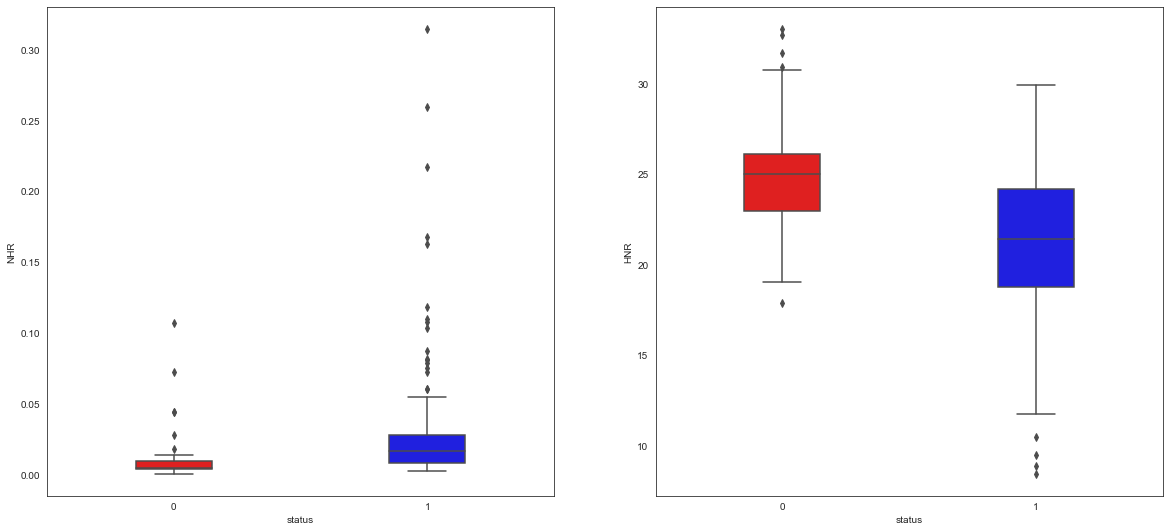

In [6]:
fig, axs = plt.subplots(ncols = 2, figsize = (20,9))
col_names = ["NHR","HNR"]
for i in range(0, len(col_names)):
    sns.boxplot(x='status', y=col_names[i], data=df, 
                width=0.3, palette=["red", "blue"], ax = axs[i])
plt.show();

#### Analysis of above diagram

People who have the disease have higher levels of Noise to  Harmonic ratio. Looking to the second box plot, 
the HNR ratio for people  who have PD are lower levels than healthy individuals.

### 3.3 Relationship between all parameters and people's heath status

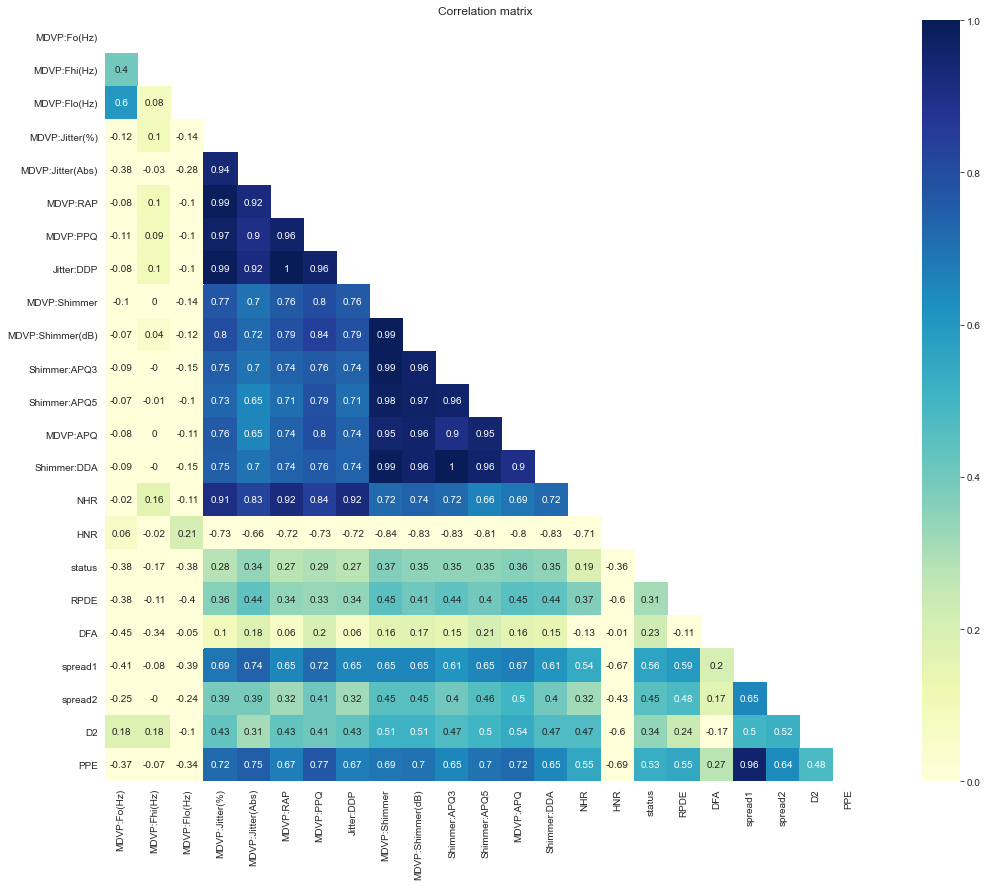

In [7]:
correlation = round(df.corr(), 2)
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 14))
    ax = sns.heatmap(correlation, cmap="YlGnBu", annot = True, mask=mask, square=True, vmin=0, vmax=1).set(title = 'Correlation matrix')
   

#### Analysis of above diagram.
* MDVP:Jitter(%) has a very high correlation with MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP.
* MDVP:Shimmer has a very correlation with MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA this may be because  they are related to each other.
* The target variable status has a weak positive correlation with all the other variables.

# 4. Models For PD Detection

#### 4.1 Data Preprocessing

In [8]:
#Data preprocessing
df = df.dropna()
X = df.drop(['name', 'status'],axis=1)
y = df["status"]
print(X.shape)
print(y.shape)

#Rescaling and transforming data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Data splitting and selection
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size = 0.3, 
                                                    random_state = 150)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_train.shape)

(195, 22)
(195,)
(136, 22) (136,)
(59, 22) (136,)


#### 4.2 Hyperparameters Selection using Random Forest Classification Model

In [9]:
# # Visulasing confusion matrix with seaborn's heatmap().
# import seaborn as sns

# def draw_cf(y_test, y_preds):
#     # Set the font scale.
#     sns.set(font_scale=1.5)
#     # Create a confusion matrix
#     conf_mat = confusion_matrix(y_test, y_preds)
#     # Plot it using seaborn
#     sns.heatmap(conf_mat);

In [10]:
## RandoForestClassification Model
model = RandomForestClassifier(n_jobs=-1, random_state=50)
parameters={'max_depth':[1,2,3,4,5,10],
 'n_estimators':[1,2,3,4,5,10],
 'max_features':[1,2,3,4,5,10],
 'criterion':['gini'],
 'bootstrap':[True],
 'min_samples_leaf':[1,2,3,4]
             }
## GridSearchCV for finding the best parameters
mod_forest = GridSearchCV(estimator=model,param_grid=parameters, cv=5)

%timeit
##Train the RDF model
mod_forest.fit(X_train,y_train)
#get best parameter of RDF model
print(mod_forest.best_params_)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 2, 'n_estimators': 10}


#### 4.3 Testing all models.

In [11]:
##Add best parameters of RandomForest 
##Test others models: Xgboost, KNN, Naive bayes, Decision Tree

ESTIMATORS = {"RandomForestClassifier": RandomForestClassifier(bootstrap=True, criterion='gini', 
                                     max_depth=5, max_features=10, 
                                     min_samples_leaf=2, n_estimators=10, random_state=50),
 "XgbClassifier": xgb.XGBClassifier(max_depth = 3, 
                                       n_estimators = 10, objective = 'binary:logistic'),
 "K-nn": KNeighborsClassifier(n_neighbors=3),
 "Naive-bayes": GaussianNB(),                     
 "DecisionTreeClassifier": DecisionTreeClassifier(criterion='entropy', random_state=10, max_depth=6)
}

#### 4.4 Model Evaluation 

In [12]:
def plot_conf_mat(conf_mat):
    """
    Plots a Confusion Matrix Using Seaborn heatmap.
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                    annot=True, # Annotate the boxes with conf_mat info  
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

In [13]:
def draw_cf(y_test, y_preds):
    # Set the font scale.
    sns.set(font_scale=1.5)
    # Create a confusion matrix
    conf_mat = confusion_matrix(y_test, y_preds)
    # Plot it using seaborn
    plot_conf_mat(conf_mat);

In [14]:
ESTIMATORS = {"RandomForestClassifier": RandomForestClassifier(bootstrap=True, criterion='gini', 
                                     max_depth=5, max_features=10, 
                                     min_samples_leaf=2, n_estimators=10, random_state=50),
 "XgbClassifier": xgb.XGBClassifier(max_depth = 3, 
                                       n_estimators = 10, objective = 'binary:logistic'),
 "K-nn": KNeighborsClassifier(n_neighbors=3),
 "Naive-bayes": GaussianNB(),                     
 "DecisionTreeClassifier": DecisionTreeClassifier(criterion='entropy', random_state=10, max_depth=6)
}

**Confusion Matrix for Random Forest Classifier**

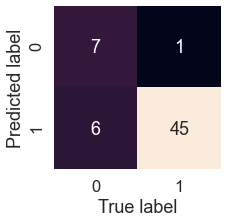

In [15]:
ESTIMATORS["RandomForestClassifier"].fit(X_train, y_train)                  
y_test_predict = ESTIMATORS["RandomForestClassifier"].predict(X_test)
draw_cf(y_test, y_test_predict)

**Confusion Matrix for XgbClassifier**

D:\MachineLearningProjects\sample_project_pandas\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:00:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


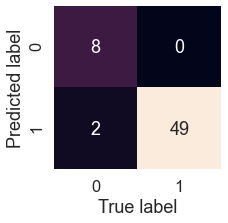

In [16]:
ESTIMATORS["XgbClassifier"].fit(X_train, y_train)                  
y_test_predict = ESTIMATORS["XgbClassifier"].predict(X_test)
draw_cf(y_test, y_test_predict)

**Confusion Matrix for K-nn**

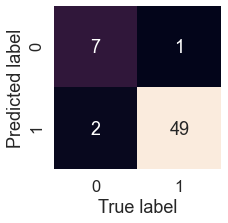

In [17]:
ESTIMATORS["K-nn"].fit(X_train, y_train)                  
y_test_predict = ESTIMATORS["K-nn"].predict(X_test)
draw_cf(y_test, y_test_predict)

**Confusion Matrix for Naive-bayes**

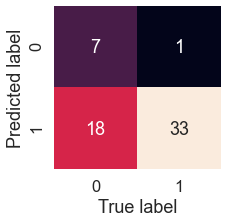

In [18]:
ESTIMATORS["Naive-bayes"].fit(X_train, y_train)                  
y_test_predict = ESTIMATORS["Naive-bayes"].predict(X_test)
draw_cf(y_test, y_test_predict)

**Confusion Matrix for Decision Tree Classifier**

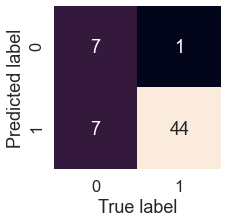

In [19]:
ESTIMATORS["DecisionTreeClassifier"].fit(X_train, y_train)                  
y_test_predict = ESTIMATORS["DecisionTreeClassifier"].predict(X_test)
draw_cf(y_test, y_test_predict)

In [20]:
##Get accuracy and f1_score
# y_test_predict = dict()
# accur = dict()
# f_score = dict()
result = pd.DataFrame()


for name, estimator in ESTIMATORS.items():     
    estimator.fit(X_train, y_train)                  
    y_test_predict = estimator.predict(X_test)   
    accur = estimator.score(X_test, y_test)
    
    f1Scroe = f1_score(y_test,y_test_predict)
    result = result.append({'Model' : name,
                            'F1-Score (%)' : f1_score(y_test,y_test_predict)*100,
                            'Accuracy (%)' : accuracy_score(y_test, y_test_predict)*100,
                            'Recall (%)' : recall_score(y_test, y_test_predict)*100},
                            ignore_index = True)

[15:00:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\MachineLearningProjects\sample_project_pandas\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


### Result of above models

In [21]:
result

,Accuracy (%),F1-Score (%),Model,Recall (%)
0,88.135593,92.783505,RandomForestClassifier,88.235294
1,96.610169,98.000000,XgbClassifier,96.078431
2,94.915254,97.029703,K-nn,96.078431
3,67.796610,77.647059,Naive-bayes,64.705882
4,86.440678,91.666667,DecisionTreeClassifier,86.274510


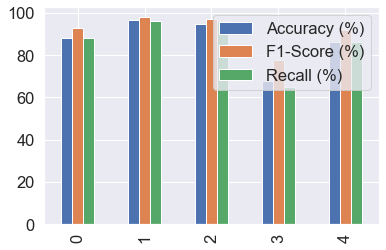

In [22]:
result.plot(kind="bar");

### Conclusion
K-nn and Xgb classifiers have performed best out of the five models, as they have the highest Accuracy and F1-Scores as well as Recall-scores and can be used for the better classification among healthy and Parkinson affected patients.